#### **Project Objective**

The business's objective in this project is to discover key insights through exploratory data analysis about factors that influence the price of listings and Airbnb bookings in New York, and the results of this information will be useful in making business decisions.

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
airbnb = pd.read_csv('/content/drive/MyDrive/Data Analyst Project/Pyhton Project/Airbnb NYC 2019 dataset.csv')

In [4]:
# Dataset First Look
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print('No. of Rows :',airbnb.shape[0])
print('No. of Columns :',airbnb.shape[1])

No. of Rows : 48895
No. of Columns : 16


### Dataset Information

In [7]:
# Dataset Info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'Duplicate Values in Dataframe : {airbnb.duplicated().sum()}')

Duplicate Values in Dataframe : 0


There is no duplicate values.All rows are unique.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values = airbnb.isnull().sum().reset_index().rename(columns = {'index':'column_name',0:'total_missing_values'})
missing_values

,column_name,total_missing_values
0,id,0
1,name,16
2,host_id,0
3,host_name,21
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


<Axes: >

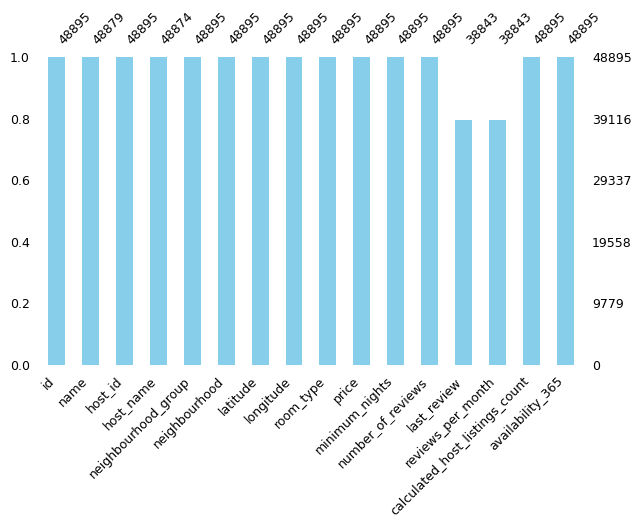

In [10]:
# Visualizing the missing values
msno.bar(airbnb,figsize=(7,4),color = 'skyblue',fontsize = 9)

#### **About Dataset**

* This Airbnb dataset comprising of the bookings made in New York City in 2019.
* This dataset has around 49,000 observations with 16 columns and it includes numerical as well as categorical data.
* There are some columns that have missing or null values; those will be treated as we proceed further.
* This dataset will be helpful for analysing the preferences of customers in terms of locations, room types, and prices across New York which will be used to take business decisions.


### Understanding the Variables

In [11]:
# Dataset Columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

* **id** : Unique listing id
* **name** : Name of the listing
* **host_id** : Unique host id
* **host_name** : Name of the host
* **neighbourhood_group** : Location
* **neighbourhood** : Area fall under neighbourhood group
* **latitude** : Latitude Coordinates
* **longitude** : Longitude Coordinates
* **room_type** : Listing space type
* **price** : Price of listing
* **minimum_nights** : Minimum nights to be paid for
* **number_of_reviews** : Number of reviews given
* **last_review** : Date of last review given
* **reviews_per_month** : Number of reviews per month
* **calculated_host_listings_count** : Amount of Listing per host
* **availability_365** : Number of days when listing is available for booking

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(airbnb.apply(lambda col: col.unique()))

id                                [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...
name                              [Clean & quiet apt home by the park, Skylit Mi...
host_id                           [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...
host_name                         [John, Jennifer, Elisabeth, LisaRoxanne, Laura...
neighbourhood_group               [Brooklyn, Manhattan, Queens, Staten Island, B...
neighbourhood                     [Kensington, Midtown, Harlem, Clinton Hill, Ea...
latitude                          [40.64749, 40.75362, 40.80902, 40.68514, 40.79...
longitude                         [-73.97237, -73.98377, -73.9419, -73.95976, -7...
room_type                              [Private room, Entire home/apt, Shared room]
price                             [149, 225, 150, 89, 80, 200, 60, 79, 135, 85, ...
minimum_nights                    [1, 3, 10, 45, 2, 5, 4, 90, 7, 14, 60, 29, 30,...
number_of_reviews                 [9, 45, 0, 270, 74, 49, 430, 118, 160, 53,

#### Data Wrangling

In [14]:
# Remove unnecessary columns
airbnb.drop(columns = ['last_review','name','id'],inplace = True)

* We have removed some columns from our dataset that are not much important for our analysis
* last_review column has 10052 null values and has less importance than reviews_per_month thats why we have removed last_review column.

In [15]:
# Replace null values for column review_per_month
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

* Here we've replaced nan values with zero because  we are assuming that the rows for which reviews per month are not avaiable, they are actually having zero reviews and this can be a real scenario.

In [16]:
# Replace null values for host_name with 'unknown'
airbnb['host_name'].fillna('Unknown',inplace=True)

In [17]:
# After replacing all the  null values let's check dataframe info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

* Now, there are no null values or missing values

In [18]:
# let's have a look at statistical description of numerical columns of dataset
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* From the above stastical description it is clear  that there is a flaw for price column that is, the minimum price is zero which is not possible. So we will going to replace min price with the average of prices that are less than 100 (i.e approximately less than 50 percentile value).

* From description it is also clear that columns like price,minimum_nights,number_of_reviews, reviews_per_month are having outliers.

In [19]:
# Replace the minimum price with average of price less than 100
min_avg_price = round(airbnb.loc[airbnb['price'] < 100,'price'].mean())
airbnb.loc[airbnb['price']==0,'price'] = min_avg_price

In [20]:
# Let's check price description
airbnb.price.describe()

,price
count,48895.000000
mean,152.735310
std,240.146849
min,10.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [21]:
# Numerical and Categorical Features
numerical_features = []
categorical_features = []
for column in list(airbnb.columns):
    if (airbnb[column].dtype) !='object':
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print('Numerical Features:',numerical_features)
print('\n')
print('Categorical Features:',categorical_features)

Numerical Features: ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Categorical Features: ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


* Removed unwanted columns that have no relevance in the current EDA analysis from the dataframe.
* Replaced all the missing values/null values with relevant values.
* Replaced the minimum price for listing, which was zero previously, with the mean of the prices that are less than 100.
* It is obvious from the statistical description of numerical columns that some of the columns, such as price, minimum_nights, number_of_reviews, and reviews_per_month, have outliers.
* Created Variable for numerical and categorical features.

#### Chart - 1

Distribution of numerical columns

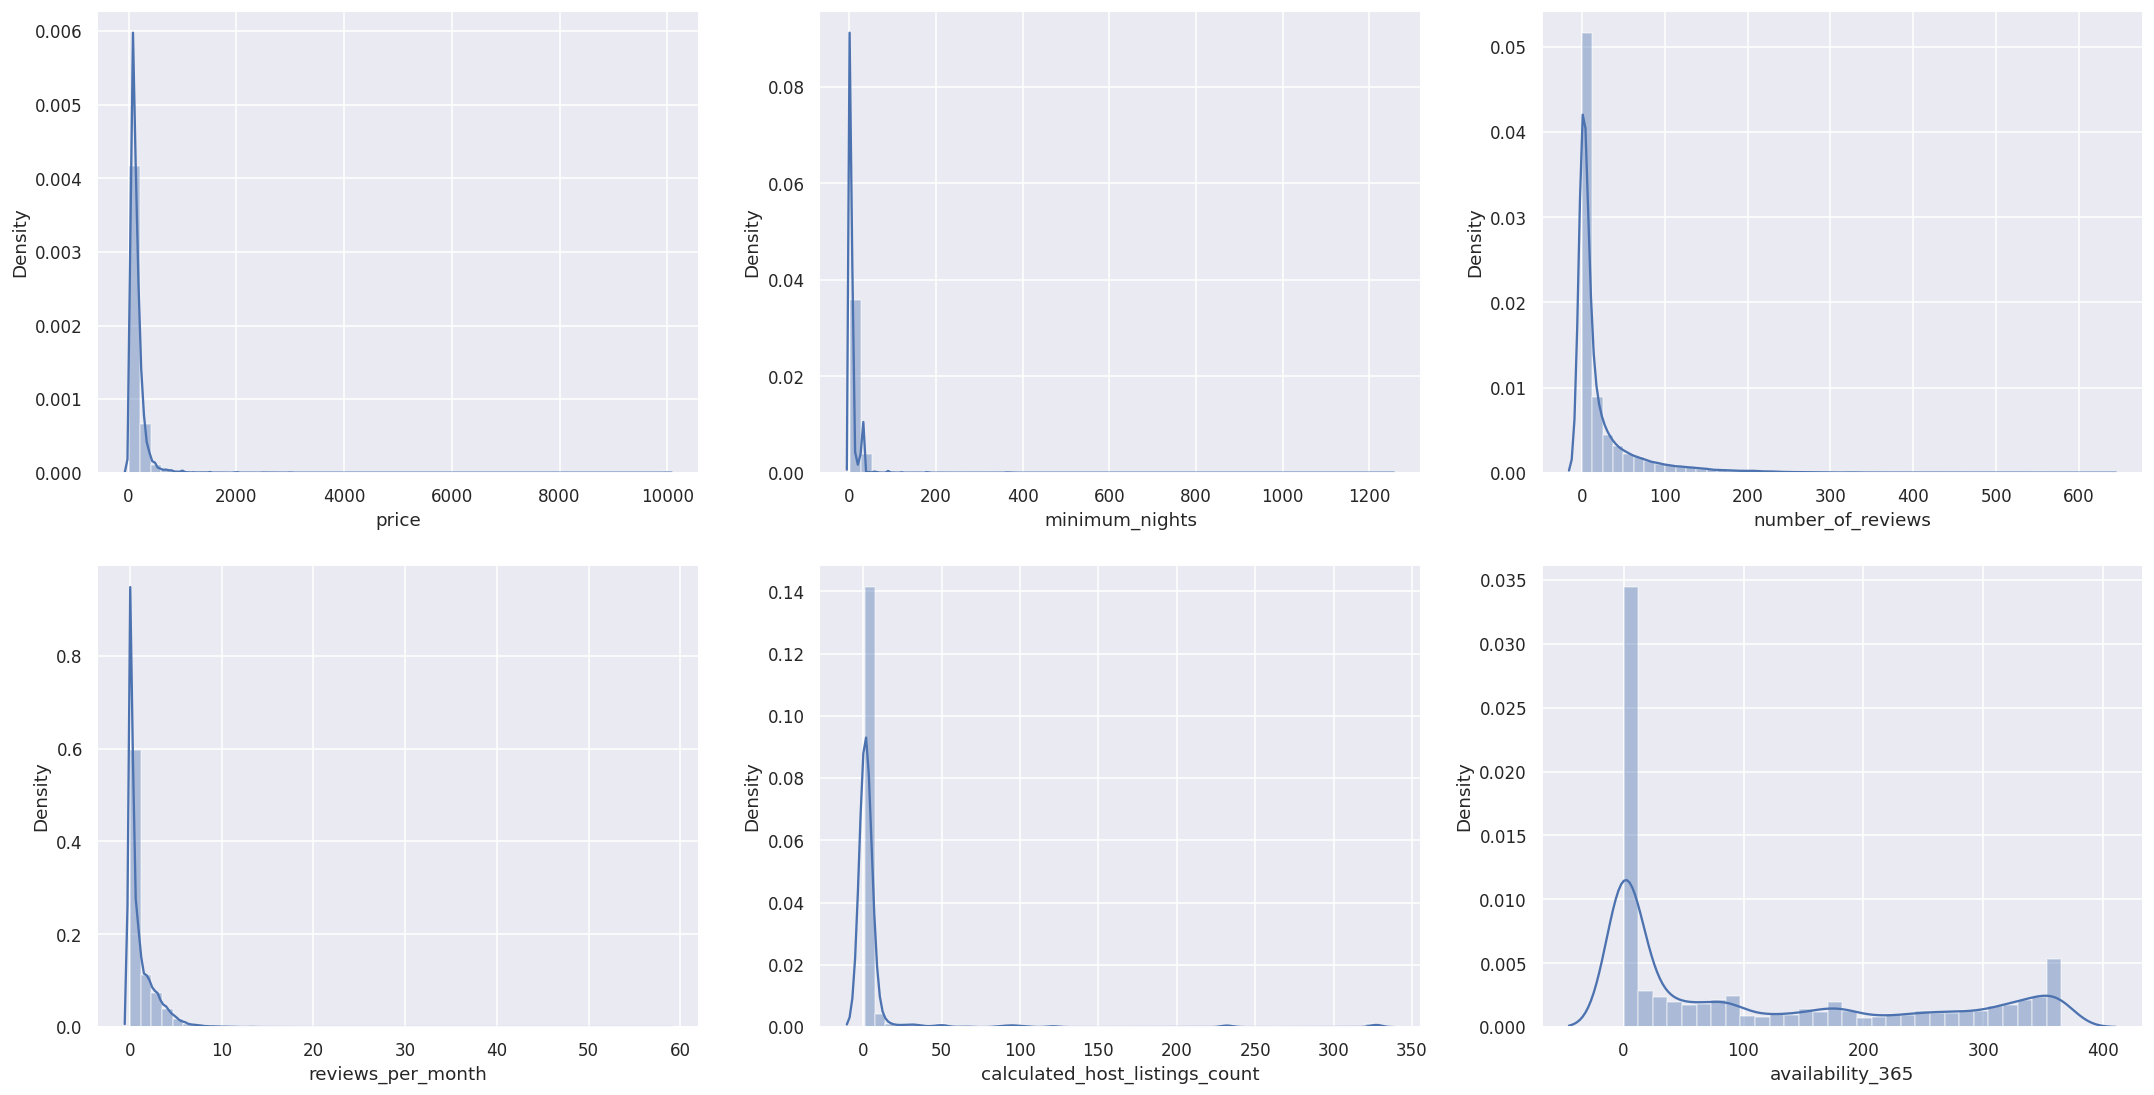

In [22]:
# Chart - 1 visualization code

# Create a new variable for numerical features by removing columns like 'host_id', 'latitude', 'longitude'
num_features = [feature for feature in numerical_features if feature not in ['host_id', 'latitude', 'longitude']]

# Visulization
sns.set_theme()
fig,axes = plt.subplots(nrows=2, ncols=3,figsize = (24,12),dpi = 110)
for feature,axes in zip(num_features,axes.ravel()):
    sns.distplot(airbnb[feature],ax = axes)
plt.show()

##### Insight(s) found from the chart

* According to the distribution of numerical columns, all of the features have a positively skewed distribution, with the exception of the availability column, which distributed uniformly throughout the year.

* The price column contains outliers, but we can't simply remove them because the reason for these outliers may be the location and type of room that justifies the price.

#### Chart - 2

Total Number of Listings For Each Neighbourhood Groups

In [26]:
# Chart - 2 visualization code

# Dataframe for Total listing count at each neighbourhood
Neighbourhood_df = airbnb['neighbourhood_group'].value_counts().reset_index().rename(columns = {'count':'total_listings'})
Neighbourhood_df

,neighbourhood_group,total_listings
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


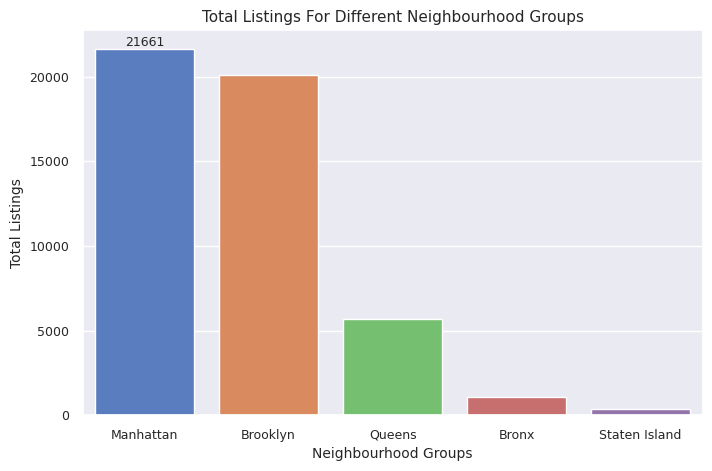

In [27]:
# Visualiztion using bar plot
plt.figure(figsize = (8,5))
plot = sns.barplot(data = Neighbourhood_df , x = 'neighbourhood_group',y = 'total_listings',palette = 'muted')
plt.bar_label(plot.containers[0], label_type='edge',size = 9)
plt.title('Total Listings For Different Neighbourhood Groups',fontsize=11)
plt.ylabel('Total Listings',fontsize=10)
plt.xlabel('Neighbourhood Groups',fontsize=10)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

##### Insight(s) found from the chart

* Manhattan and Brooklyn have the most listings, with over 20,000 each, compared to other neighbourhood groups.
* Staten Island has only 373 listings and hence stands last in the list.

#### Chart - 3

Top Neighbourhoods According To Listing Counts

In [30]:
# Chart - 3 visualization code

# Dataframe of top neighbourhoods
top_neighbourhood = airbnb['neighbourhood'].value_counts().reset_index().rename(columns = {'count':'listing_count'})
top_neighbourhood

,neighbourhood,listing_count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


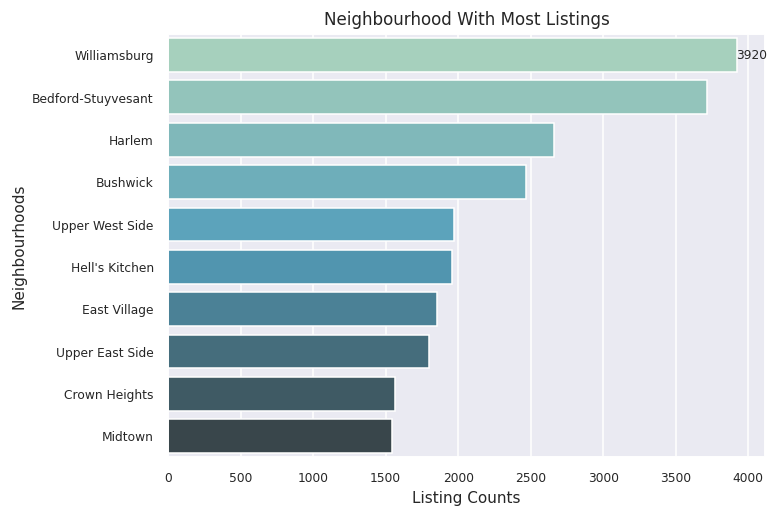

In [31]:
# Visualiztion using bar plot
plt.figure(figsize = (7,5),dpi = 110)
plot = sns.barplot(data = top_neighbourhood[:10],x = 'listing_count',y = 'neighbourhood',palette='GnBu_d' )
plt.bar_label(plot.containers[0], label_type='edge',size = 8)
plt.title('Neighbourhood With Most Listings',fontsize=11)
plt.ylabel('Neighbourhoods',fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel('Listing Counts',fontsize=10)
plt.xticks(fontsize=8)
plt.show()